In [ ]:
%pip install bezier
import colorsys
from PIL import Image
import bezier
import numpy
from matplotlib import patches, pyplot

# RGB colors in HSL

In [ ]:
rgb = (0, 255, 0)
# scale components from [0, 255] to [0, 1]
rgb_floats = tuple(val/255 for val in rgb)
# convert color, using H-L-S order, not H-S-L
hue, lightness, saturation = colorsys.rgb_to_hls(*rgb_floats)
# scale hue to [0, 360] degrees
hsl = (hue * 360, saturation, lightness)
print(f"RGB {rgb} = HSL {hsl}")
print("RGB color swatch:")
Image.new("RGB", (20, 20), color=rgb)

RGB (0, 255, 0) = HSL (120.0, 1.0, 0.5)
RGB color swatch:


# HSL colors in RGB

In [ ]:
hue, saturation, lightness = (14, .8, .6)
# scale hue from [0, 360] degrees to [0, 1] and use H-L-S order, not H-S-L
hls_floats = (hue/360, lightness, saturation)
rgb_floats = colorsys.hls_to_rgb(*hls_floats)
# scale components from [0, 1] to [0, 255]
rgb = tuple(round(val * 255) for val in rgb_floats)
print(f"HSL {hue, saturation, lightness} ≈ RGB {rgb}")
print("RGB color swatch:")
Image.new("RGB", (20, 20), color=rgb)

HSL (14, 0.8, 0.6) ≈ RGB (235, 109, 71)
RGB color swatch:


# Finding one point on a Bézier curve

In [ ]:
# create the curve
controlPoints = [(2,3), (-3,5)]
curve = bezier.Curve(numpy.array(controlPoints).transpose(), len(controlPoints)-1)
# evaluate it at a given parameter value
t = 1/2
print(f"value at t = {t} is", curve.evaluate(t).transpose())

value at t = 0.3333333333333333 is [[10.          3.55555556]]


# Finding a set of points on a Bézier curve

In [ ]:
controlPoints = [(0, 9), (50, 9), (0, 0), (30, 1)]
curve = bezier.Curve(numpy.array(controlPoints).transpose(), len(controlPoints)-1)
# create an array of parameter values:
#   10 values linearly spaced from 0 to 1 that are then squared
t_array = numpy.linspace(0, 1, 10) ** 2
# evaluate at all of those parameter values
print(f"values at t=", t_array, "are...")
print(curve.evaluate_multi(t_array).transpose())

values at t= [0.         0.01234568 0.04938272 0.11111111 0.19753086 0.30864198
 0.44444444 0.60493827 0.79012346 1.        ] are...
[[ 0.          9.        ]
 [ 1.80646582  8.99592053]
 [ 6.69748853  8.9364445 ]
 [13.20987654  8.69272977]
 [19.31141933  8.09294164]
 [23.01055056  6.98660623]
 [23.20987654  5.33470508]
 [20.80356992  3.3255112 ]
 [20.0186286   1.51616642]
 [30.          1.        ]]


# Drawing a Bézier curve

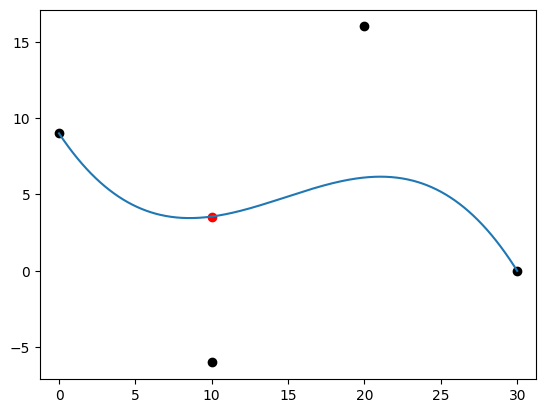

In [ ]:
controlPoints = [(0, 9), (10, -6), (20, 16), (30, 0)]
curve = bezier.Curve(numpy.array(controlPoints).transpose(), len(controlPoints)-1)
# plot the curve
curve.plot(num_pts=500)
# plot the control points in black by pulling out their x and y coordinates
pyplot.scatter(numpy.array(controlPoints)[:, 0], numpy.array(controlPoints)[:, 1], c="black")
# plot selected point in red by pulling out its x and y coordinates
t = 1/3
point = curve.evaluate(t).transpose()
pyplot.scatter(point[:, 0], point[:, 1], c="red")
pyplot.axis("equal") ;

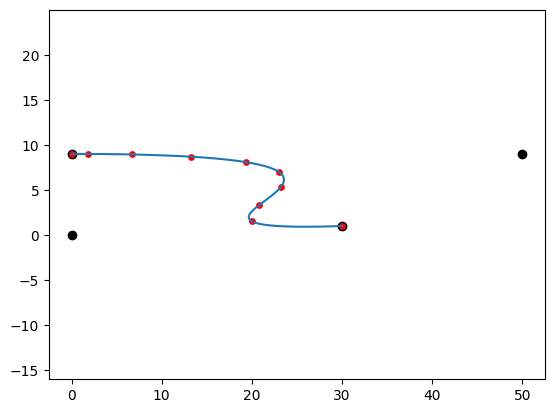

In [ ]:
controlPoints = [(0, 9), (50, 9), (0, 0), (30, 1)]
curve = bezier.Curve(numpy.array(controlPoints).transpose(), len(controlPoints)-1)
# plot the curve
curve.plot(num_pts=500)
# plot the control points in black by pulling out their x and y coordinates
pyplot.scatter(numpy.array(controlPoints)[:, 0], numpy.array(controlPoints)[:, 1], c="black")
# plot selected points in red by pulling out their x and y coordinates
t_array = numpy.linspace(0, 1, 10) ** 2
points = curve.evaluate_multi(t_array).transpose()
pyplot.scatter(points[:, 0], points[:, 1], c="red", s=15)
pyplot.axis("equal") ;